<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аннотация:-защита-персональных-данных-клиентов" data-toc-modified-id="Аннотация:-защита-персональных-данных-клиентов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аннотация: защита персональных данных клиентов</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговые выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Аннотация: защита персональных данных клиентов

Необходимо разработать метод преобразования данных клиентов страховой компании «Хоть потоп» для их защиты через обеспечение невозможности восстановления персональной информации. 

**Цель** проекта: разработать алгоритм шифрования данных. 

**Задачи** проекта: обосновать корректность работы алгоритма и обеспечить сохранение качества модели машинного обучения на до-шифрованном уровне.

## Знакомство с данными

In [1]:
#импортируем библиотеки и инструменты, которые понадобятся нам в исследовании
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
initial_data = pd.read_csv('/datasets/insurance.csv') #применяем специальный метод для чтения файла формата csv

#выводим основную информацию о датасете
print(initial_data.info())
print()
display(initial_data.head(10)) 
print()
display(initial_data.describe()) 
print()
print('Количество явных дубликатов:', initial_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



Количество явных дубликатов: 153


### Выводы:

Знакомство с данными позволило выявить следующие особенности:
- исходный фрейм состоит из 5 столбцов и 5000 строк;
- пропусков в данных не обнаружено;
- данные в столбце с возрастом имеют некорректный тип;
- столбцы проименованы некорректно;
- обнаружено 153 явных дубликата;
- возможно присутствие аномалий в столбцах с количеством членов семьи и страховых выплат.

На следующем этапе исследования предобработаем исходные данные для улучшения их качества.

## Предобработка данных

Начнем предобработку данных с удаления из них явных дубликатов.

In [3]:
initial_data = initial_data.drop_duplicates().reset_index(drop=True) #удаляем дубликаты
print('Количество явных дубликатов:', initial_data.duplicated().sum()) #проверяем результат

Количество явных дубликатов: 0


Далее переименуем столбцы согласно правилам стиля и скорректируем тип данных в столбце с возрастом клиентов.

In [4]:
#переименовываем столбцы
initial_data.columns = ['gender', 'age', 'salary', 'number_of_family_members', 'number_of_insurance_payments']
#меняем тип данных
initial_data['age'] = initial_data['age'].astype('int')  

Через построение графиков проверим данные о количестве членов семьи и страховых выплат на наличие аномалий.

<AxesSubplot:title={'center':'number_of_family_members'}, ylabel='Frequency'>

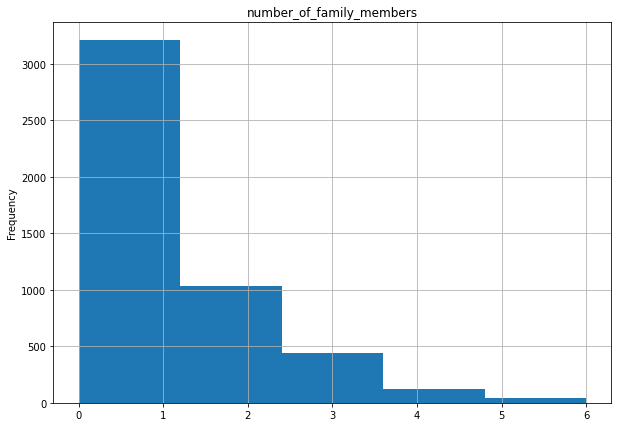

In [5]:
initial_data['number_of_family_members'].plot(kind='hist', bins = 5, figsize=(10,7), grid=True, title='number_of_family_members')

<AxesSubplot:title={'center':'number_of_insurance_payments'}, ylabel='Frequency'>

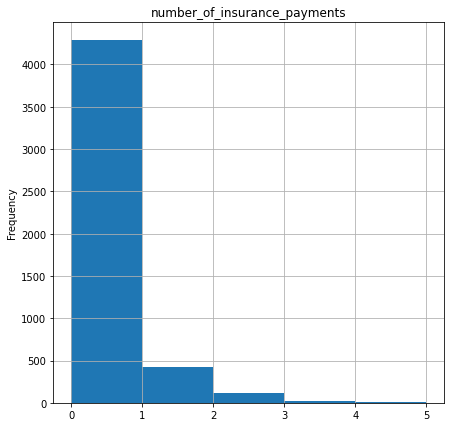

In [6]:
initial_data['number_of_insurance_payments'].plot(kind='hist', bins = 5, figsize=(7,7), grid=True, title='number_of_insurance_payments')

Аномальных значений не обнаружено.

### Выводы:

На этапе предобработки данных было сделано следующее:
- удалены строки, содержащие дубликаты;
- переименованы столбцы в соответствии с правилами стиля;
- скорректирован тип данных столбца age;
- предположение о наличии аномальных значений в столбцах number_of_family_members и number_of_insurance_payments не подтвердилось.

На следующем этапе произведем математическое обоснование предположения, которое составит основу будущего алгоритма.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу?

**Ответ:** Нет, не изменится.

**Обоснование:** В формуле предсказаний домножим матрицу признаков Х на обратимую матрицу Р. Получим:

$$ a' = XP((XР)^T (XP))^{-1} (XР)^T y $$

С учетом свойств матриц 1.1 и 1.2 раскроем скобки.

$$ (АВ)^{-1} = В^{-1} А^{-1}   (1.1) $$
$$ (АВ)^Т = В^Т А^Т   (1.2) $$

$$ a' = XP (P^T (X^T X) P)^{-1} P^T X^T y = XP P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$

Продолжим преобразования с учетом свойств матриц 1.3 и 1.4 (E - единичная матрица).

$$ EA = AE = A   (1.3) $$
$$ A^{-1} A = E  (1.4) $$

$$ a' = XE (X^T X)^{-1} E X^T y $$
$$ a' = X (X^T X)^{-1}  X^T y $$
$$ a' = X w $$

Следовательно, $ a = a' $. Значит, домножение матрицы признаков Х на обратимую матрицу Р не изменило первоначальное предсказание.

### Выводы:

Нами было доказано, что, при умножении матрицы признаков на случайно сгенерированную обратимую матрицу, качество линейной регрессии не изменится. Основываясь на этом, на следующем этапе разработаем алгоритм преобразования данных клиентов.

## Алгоритм преобразования

**Алгоритм**

С целью шифрования данных пользователей, умножим матрицу признаков на случайно сгенерированную обратимую матрицу P размером nxn, где n - количество нецелевых признаков. 

Затем произведем обучение модели линейной регресии на исходных и обработанных данных, сделаем предсказания, произведем оценку качества работы моделей и сравним полученные значения метрик между собой.

**Обоснование**

Согласно данным предыдущего шага, такой алгоритм приведет к получению одинаковых результатов. Допустима небольшая погрешность.

## Проверка алгоритма

Проверим предложенный на предыдущем этапе алгоритм на имеющихся в нашем распоряжении данных клиентов страховой компании.

In [7]:
#разделим исходную таблицу на признаки и целевой признак
initial_features = initial_data.drop(columns='number_of_insurance_payments')
initial_target = initial_data['number_of_insurance_payments']

#сгенерируем случайную матрицу нужного размера с учетом ее обратимости
while True:
    random_matrix = np.random.rand(4, 4)
    try:
        inv_matrix = np.linalg.inv(random_matrix)
        break
    except:
        continue
        
new_features = np.array(initial_features) @ random_matrix #умножим матрицу признаков на случайную матрицу
new_features = pd.DataFrame(new_features)
new_features.columns = initial_features.columns #обозначим столбцы для удобства дальнейшей работы

print(new_features.head())

         gender          age       salary  number_of_family_members
0  30452.082092  4451.559082  4566.688182              42278.070894
1  23335.833096  3420.096732  3502.095395              32402.583007
2  12896.892203  1892.136494  1935.726413              17909.306471
3  25598.017698  3733.756131  3836.625994              35532.893986
4  16026.036328  2346.693856  2404.393356              22252.641111


In [8]:
#делим исходные и преобразованные данные данные на обучающую и тестовую выборки
initial_features_train, initial_features_test, initial_target_train, initial_target_test = train_test_split(initial_features, 
                                                                    initial_target, test_size = 0.25, random_state = 12345)

new_features_train, new_features_test, new_target_train, new_target_test = train_test_split(new_features, initial_target, 
                                                                                        test_size = 0.25, random_state = 12345)

In [9]:
#обучаем и тестируем модель на исходных данных
model = LinearRegression()
model.fit(initial_features_train, initial_target_train)
predictions = model.predict(initial_features_test)
r2_initial = r2_score(initial_target_test, predictions) #определям качество модели

#обучаем и тестируем модель на преобразованных данных
new_model = LinearRegression()
new_model.fit(new_features_train, new_target_train)
new_predictions = new_model.predict(new_features_test)
r2_new = r2_score(new_target_test, new_predictions)

print('R2-score до шифрования:', r2_initial)
print('R2-score после шифрования: ', r2_new)

R2-score до шифрования: 0.42307727492147296
R2-score после шифрования:  0.4230772749214361


### Вывод:

После преобразования данных значение метрики R2-score практически не изменилось, следовательно, предложенный ранее алгоритм работает корректно.

## Итоговые выводы

В ходе данного проекта был разработан алгоритм преобразования персональных данных клиентов страховой компании «Хоть потоп» с целью их шифрования и защиты. Искомым методом преобразования стало умножение матрицы признаков на случайно сгенерированную обратимую матрицу. 

Согласно проведенным исследованиям, данная операция не влияет на качество работы модели линейной регрессии.